<a href="https://colab.research.google.com/github/ameliavasiliu/wrangling/blob/main/assignment/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [8]:
#1
import pandas as pd
df = pd.read_csv("airbnb_hw.csv")
df.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [9]:
df["Price"].dtype # inspecting the dtype of price - we can observe that this is an object likely bc of the commas

dtype('O')

In [10]:
df["Price"].unique() # inspecting the values to know better how to clean; can see commas begin in 1000s

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [11]:
df['Price'].isna().sum() # there appear to be no missing values

0

In [12]:
df['Price'] = df['Price'].replace({',': ''}, regex=True) # removing "$" and "," from the data set so we can convert to an int instead of object

In [13]:
df['Price'] = pd.to_numeric(df['Price']) # convert from object to numeric

In [14]:
df["Price"].dtype # all values are now numeric and the data appears to be cleaned - there are no missing values

dtype('int64')

In [16]:
df["Price"].unique() # checking to see that data set is clean

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

In [17]:
#2
df2 = pd.read_csv("mn_police_use_of_force.csv")
df2.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [18]:
Na = df2["subject_injury"].isna().sum()
Na / len(df2) #can be observed here that about 76% of this variable is missing and entered as Na

0.7619342359767892

The above statistic is concerning, as the data was not entered for if the suject was harmed or not for majority of the cases.

In [19]:
df2['subject_injury'].fillna('Missing', inplace=True) # I chose to replace this with "missing" so I can better look at the cross tabuulation

<ipython-input-19-478f3dae809a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['subject_injury'].fillna('Missing', inplace=True) # I chose to replace this with "missing"


In [20]:
pd.crosstab(df2['subject_injury'], df2['force_type'])

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


There appears to be a strong correlation between missing values and methods of police force - especially in the categories of taser, improvised weapon, chemical irritant, and bodily force. In all of the metnioned categories of force, there are more recorded instances within the missing row than the yes row. To me, this indicates officers are lying about injury and generally not inputting if the person was hurt - based on the data above, I would say most of them probably were.

In [52]:
#3
df3 = pd.read_parquet("justice_data.parquet")
df3

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22981,SJA00343,22839,M,B,1976,41,4,41,2,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22982,SJA00344,,F,W,,,9,,99,99,...,,,,999,999,,3,,9,Defendant could not be classified or tracked d...
22983,SJA00345,22841,M,B,1981,36,4,36,1,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22984,SJA00346,22842,F,B,1993,24,2,24,5,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [53]:
df3['WhetherDefendantWasReleasedPretrial'].unique()

array([9, 0, 1])

In [54]:
import numpy as np
df3['WhetherDefendantWasReleasedPretrial'].replace([None, '', " "], np.nan) #replacing missing values with np.nan
df3['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan) # replacing the 9 with np.nan because this is yes or no - boolean

,WhetherDefendantWasReleasedPretrial
0,NaN
1,0.0
2,0.0
3,0.0
4,1.0
...,...
22981,1.0
22982,1.0
22983,1.0
22984,1.0


In [55]:
df3['WhetherDefendantWasReleasedPretrial'].astype(bool) # tried to change to boolean but noticed that the NaN value is automatically changed to True
# perhaps it is better to leave the data as a float so that the NaN values are not converted

,WhetherDefendantWasReleasedPretrial
0,True
1,False
2,False
3,False
4,True
...,...
22981,True
22982,True
22983,True
22984,True


In [70]:
#4
df3["ImposedSentenceAllChargeInContactEvent"].unique()

array([  60,   12,    0,   36,    6,   24,    5,  120,   72,   11,    2,
         84,  108,  300,  240,  180,    4,   96,   54,   44,  115,  132,
         48,  258,   34,   76,  111,    9,    3,    1,   35,  106,    8,
         18,  480,   32,   93,  234,  732,   21,    7,  600,   43,  179,
         52,   30,   20,  192,  702,   14,   55,   53,  114,   68,   46,
        102,   65,  200,   57,  117,   81,   22, 1980,   56,   10,   47,
       1500,   40,  284,  118,   42,  162,  156,  105,   51,  246,   29,
         75,  324,  360,   59,   66,  660,   78,  228,   62,   86,  168,
         23,   33,  720,  348, 1200,   27,   49,   87,  420,   63,   79,
         17,  238,  126,   45,  158,  216,  227,  445,   70,  516,  177,
       1752,   90, 1080,  141,  230,   31, 2208,   69,   26,  140,  131,
        344,  219,  101,   71,   58,   67,   91,  155,   92,  207,   74,
        518,   28,  237,  404,  551,   39,   15,  124,  176,   19,  482,
        129,   88,  128,  136,   50,  363,  288,  2

In [57]:
df3["SentenceTypeAllChargesAtConvictionInContactEvent"].unique()

array([9, 0, 1, 4, 2])

In [60]:
df3['ImposedSentenceAllChargeInContactEvent'] = df3['ImposedSentenceAllChargeInContactEvent'].replace(['', ' ', 'NA', 'NULL', 'None', 'NaN'], np.nan)

In [61]:
df3['ImposedSentenceAllChargeInContactEvent'].dtype # object, might be best to change it to numeric since this is number of months of the sentence

dtype('O')

In [62]:
df3['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df3['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

In [65]:
#want to change to integer to perform cross tabulation, so need to remove Nans
df3 = df3.dropna(subset=['ImposedSentenceAllChargeInContactEvent'])

In [66]:
df3['ImposedSentenceAllChargeInContactEvent'] = df3['ImposedSentenceAllChargeInContactEvent'].astype(int)

<ipython-input-66-7ca52af6df31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ImposedSentenceAllChargeInContactEvent'] = df3['ImposedSentenceAllChargeInContactEvent'].astype(int)


In [67]:
df3['ImposedSentenceAllChargeInContactEvent'].unique()

array([  60,   12,    0,   36,    6,   24,    5,  120,   72,   11,    2,
         84,  108,  300,  240,  180,    4,   96,   54,   44,  115,  132,
         48,  258,   34,   76,  111,    9,    3,    1,   35,  106,    8,
         18,  480,   32,   93,  234,  732,   21,    7,  600,   43,  179,
         52,   30,   20,  192,  702,   14,   55,   53,  114,   68,   46,
        102,   65,  200,   57,  117,   81,   22, 1980,   56,   10,   47,
       1500,   40,  284,  118,   42,  162,  156,  105,   51,  246,   29,
         75,  324,  360,   59,   66,  660,   78,  228,   62,   86,  168,
         23,   33,  720,  348, 1200,   27,   49,   87,  420,   63,   79,
         17,  238,  126,   45,  158,  216,  227,  445,   70,  516,  177,
       1752,   90, 1080,  141,  230,   31, 2208,   69,   26,  140,  131,
        344,  219,  101,   71,   58,   67,   91,  155,   92,  207,   74,
        518,   28,  237,  404,  551,   39,   15,  124,  176,   19,  482,
        129,   88,  128,  136,   50,  363,  288,  2

In [68]:
pd.crosstab(df3['ImposedSentenceAllChargeInContactEvent'], df3["SentenceTypeAllChargesAtConvictionInContactEvent"])

SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2
ImposedSentenceAllChargeInContactEvent,,,
0,6047,753,0
1,47,58,0
2,229,169,0
3,462,374,0
4,44,69,0
...,...,...,...
1200,0,0,1
1500,0,0,1
1752,0,0,1


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [77]:
#1
df4 = pd.read_excel("GSAF5.xls")
df4

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6988,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6989,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6990,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [75]:
df4.shape[1]

23

In [76]:
#2
df4 = df4.dropna(axis=1, thresh=int(0.45*len(df4))) # initially tried dropping columns wiht all Nans but none were dropped so decided to drop columns with 45% or more missing
df4.shape[1]

21

In [78]:
df4["Year"] = pd.to_numeric(df4['Year'], errors='coerce')
df4 = df4.dropna(subset=['Year'])

In [79]:
df4['Year'].unique()

array([2025., 2024., 2026., 2023., 2022., 2021., 2020., 2019., 2018.,
       2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010., 2009.,
       2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000.,
       1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993., 1992.,
       1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965., 1964.,
       1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956., 1955.,
       1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848., 1947.,
       1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921., 1920.,
       1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912., 1911.,
       1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903., 1902.,
       1901., 1900.,

In [82]:
df4['Year'] = df4['Year'].astype(int)
df4 = df4[(df4['Year'] != 2026) & (df4['Year'] >= 1800)]

In the year column, there appears to be values randing from 0 to 2025.

In [83]:
#3
df4 = df4[df4['Year'] >= 1940]
df4.groupby('Year').size()

,0
Year,
1940,24
1941,27
1942,41
1943,28
1944,31
...,...
2021,109
2022,98
2023,109


It appears that shark attakcs have been increasing through the years according to the data presented above.

In [85]:
#4
df4["Age"].unique()

array([12, 37, 23, 40, 28, 69, 48, '60+', '?', 57, 24, 45, 61, 27, 38, 16,
       33, 30, 15, 41, 14, 26, 'Middle age', 18, 21, 49, 25, 46, 19, 20,
       65, 64, '13', nan, '11', '46', '32', '29', '10', '64', '62', '39',
       '22', '15', '16', '21', '66', '52', '20', '44', '26', '47', '55',
       '30', '59', '8', '50', '45', '34', '38', '30s', '37', '9', '19',
       '20/30', '35', '65', '20s', '77', '60', '49', '42', '!2', '24',
       '73', '25', '18', '50s', '58', '67', '17', '14', '6', '41', '53',
       '68', '43', '40', '51', '31', 39, 58, 51, 17, 10, 13, 60, '40s',
       68, 35, 62, 'teen', 8, 22, 32, 56, 'Teen', 42, 36, 50, 'M', 9, 11,
       34, '!6', 31, '!!', 47, 55, 7, 71, 59, 53, 54, 75, '45 and 15', 73,
       52, 29, 70, 4, 63, 44, '28 & 22', '22, 57, 31', '60s', "20's", 43,
       67, 74, '9 & 60', 'a minor', 6, 3, 82, 66, 72, '23', '12', '36',
       '63', '71', '48', '70', '18 months', '57', '7', '28', '33', '61',
       '74', '27', '3', '56', '28 & 26', '5', '54

In [95]:
df4['Age'] = df4['Age'].astype(str).str.strip()
remove = df4['Age'].str.contains(
    r'(?i)(teen|middle|adult|elderly|months|minor|!|X|a|[?]|[&]|[+]|[\s]|to|\d{1,2}\s?or\s?\d{1,2}|[^0-9])',
    na=False
)
df4.loc[remove, 'Age'] = np.nan
df4['Age'] = df4['Age'].replace({
    r'.*s$': lambda x: x[:2],
    r'(\d+)\+': r'\1',
}, regex=True)

<ipython-input-95-7b85fdee4e2d>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  remove = df4['Age'].str.contains(


In [96]:
df4['Age'] = pd.to_numeric(df4['Age'], errors='coerce')

In [99]:
df4 = df4.dropna(subset=['Age'])

In [103]:
df4['Age'] = df4["Age"].astype(int)
df4['Age'].unique()

array([12, 37, 23, 40, 28, 69, 48, 57, 24, 45, 61, 27, 38, 16, 33, 30, 15,
       41, 14, 26, 18, 21, 49, 25, 46, 19, 20, 65, 64, 13, 11, 32, 29, 10,
       62, 39, 22, 66, 52, 44, 47, 55, 59,  8, 50, 34,  9, 35, 77, 60, 42,
       73, 58, 67, 17,  6, 53, 68, 43, 51, 31, 56, 36,  7, 71, 54, 75, 70,
        4, 63, 74,  3, 82, 72,  5, 86, 84, 87,  1, 81, 78])

(array([  6., 118., 370., 693., 559., 445., 317., 257., 226., 174., 140.,
        106.,  71.,  40.,  22.,   9.,   3.,   2.,   0.,   0.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

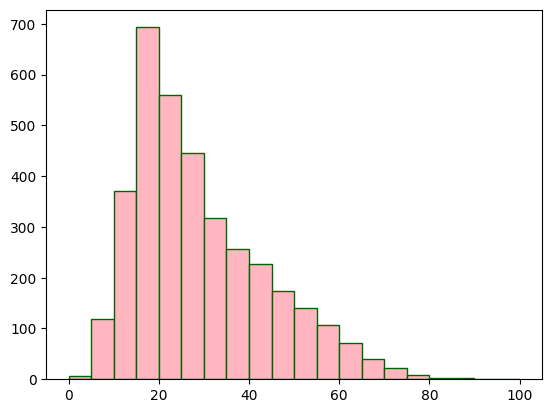

In [108]:
import matplotlib.pyplot as plt
plt.hist(df4['Age'], bins=range(0, 101, 5), color='lightpink', edgecolor='darkgreen')

In [120]:
#5
df4["Sex"].unique()

array(['M', 'F', nan, ' M', 'M '], dtype=object)

In [127]:
df4['Sex'] = df4['Sex'].astype(str)
df4['Sex'] = df4['Sex'].str.strip()
df4['Sex'] = df4['Sex'].replace({
    'm': 'M', 'M': 'M',
    'f': 'F', 'F': 'F'
})
df4['Sex'] = df4['Sex'].replace({'lli': np.nan})

In [128]:
df4["Sex"].unique()

array(['M', 'F', 'nan'], dtype=object)

In [130]:
M = (df4['Sex'] == 'M').sum()
M / len(df4['Sex']) # 83% of victims are male

0.8378302417088251

In [131]:
#6
df4["Type"].unique()

array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Sea Disaster', '?', nan, 'Invalid', 'Under investigation'],
      dtype=object)

In [139]:
df4['Type'] = df4['Type'].apply(lambda x: x if x in ['Unprovoked', 'Provoked'] else "unknown")
df4["Type"].unique()

array(['Unprovoked', 'Provoked', 'unknown'], dtype=object)

In [140]:
count = (df4['Type'] == 'Unprovoked').sum()
count / len(df4["Type"]) # 83% of attacks are unprovoked

0.8310848791455874

In [141]:
#7
df4["Fatal Y/N"].unique()

array(['N', 'Y', 'F', 'Unknown', 'M', 2017, 'UNKNOWN', ' N'], dtype=object)

In [158]:
df4['Fatal Y/N'] = df4['Fatal Y/N'].astype(str)
df4['Fatal Y/N'] = df4['Fatal Y/N'].str.strip()
df4['Fatal Y/N'] = df4['Fatal Y/N'].replace({
    'y': 'Y',
    'n': 'N',
    'unknown': 'Unknown',
    'maybe': 'Unknown',
    ' ': 'Unknown',
    'f': 'Unknown',
    'm': 'Unknown',
    '2017': 'Unknown',
    np.nan: 'Unknown'
})
df4["Fatal Y/N"].unique()

array(['N', 'Y', 'Unknown'], dtype=object)

In [153]:
#8
pd.crosstab(df4["Type"], df4["Sex"])

Sex,F,M,nan
Type,,,
Provoked,21,265,5
Unprovoked,475,2459,23
unknown,48,257,5


It appears that sharks are more likely to launch unprovoked attacks on men than women, by observing the data above. There is a significantly higher number of unprovoked attacks on men than women.

In [154]:
pd.crosstab(df4["Type"], df4["Fatal Y/N"])

Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,280,3,8
Unprovoked,2457,18,482
unknown,87,195,28


It is more likely for the attack to be fatal in an unprovoked attack. 482 / 2957 = 18.55% of attacks are fatal that are unprovoked vs 8 / 291 = 2.7% fatal that are provoked

In [155]:
pd.crosstab(df4["Sex"], df4["Fatal Y/N"])

Fatal Y/N,N,Unknown,Y
Sex,,,
F,436,35,73
M,2366,177,438
nan,22,4,7


I personally do not care for sharks. They are chill in the ocean but I never want to see one next to me quite frankly.

In [165]:
# 9
df4.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [166]:
df4.columns = df4.columns.str.strip()

In [168]:
df4['Species'].unique()

array(['Not stated', 'Bronze whaler', 'Reportedly Tiger or Bull shark',
       ..., "Mako shark (aka bonito shark) 1.2 m [4'] ",
       'White shark, species identity confirmed by tooth pattern',
       'White shark, 160-kg [353-lb], identity confirmed by tooth pattern'],
      dtype=object)

In [171]:
white_sharks = df4[df4['Species'].str.contains('white', case=False, na=False)]
len(white_sharks) / len(df4["Species"]) # 13% appeat to be by white sharks

0.13209668353007306

It appears that being males and females have a similar probability of being in a fatal attack with a shark. 438 / 2981 = 14.7% for males in fatal attacks vs 73 / 544 = 13.4% females.

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1. According to the Census Bureau website, data on race is collected by self identification. This means that people fill out the census and identify their race and the Census uses this data to provide statistics on the race composition of the country.

2. It is important to gather this data to know the demographics that make up our country. These statistics play a huge role in politics by influencing policy decisions, resource distribution, and even electoral representation. Data quality matters because inaccurate or incomplete data can lead to misinformed decisions, affecting everything from government funding to social programs.

3. The census could improve by better reaching underrepresented groups, particularly in rural areas and marginalized communities, where response rates are typically lower. Future surveys should incorporate more inclusive methods, like using multiple languages and enhancing outreach to groups that are hard to reach, to better reflect the population's diversity. Some of the Census' best practices, such as careful data verification and periodic updates, could definitely be applied to other surveys to enhance the accuracy of data collected.

4. The data on sex and gender was collected by self-identification. However, this may not be a completely accurate representation of sex and gender identify, as politics and predjudices may play a role and influence what an individual puts down. Especially in todays social environment where there is a lot of hostility against the LGBTQ+ community, people may be afraid to answer the survey truthfully - this is why data privacy and confidentiality is incredibly important.

5. I have concerns over the privacy of people's data when cleaing the data. This is incredibly sensitive and private infromation that people cleaning the data set should not have access too; I personally think this could be really dangerous. When cleaning data on protected characteristics like sex, gender, sexual identity, or race, there's always the risk of reinforcing biases if categories are oversimplified or misrepresented. Missing values can pose significant challenges, especially if the gaps are for these sensitive categories, as assumptions or imputation might lead to inaccurate conclusions. Good practices would involve being transparent about how missing data is handled and ensuring categories are inclusive, while bad practices might involve filling in missing values based on assumptions.

6. While I really like the idea of an algorithm so that the information is protected, it makes me wonder how preotected the information would actually be. Also, I believe the algorithm may reinforce biases by of the humans that created the algorithm it is almost unavoidable.